In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE

In [3]:

df = pd.read_json (r'C:\Users\saif\OneDrive\Desktop\reco\dataset\cont/StreamingHistory0.json')
df.to_csv (r'C:\Users\saif\OneDrive\Desktop\reco\dataset\cont/StreamingHistory.csv', index = None)

In [4]:
df = pd.read_csv(r"C:\Users\saif\OneDrive\Desktop\reco\dataset\cont/StreamingHistory.csv")
df.head()

,endTime,artistName,trackName,msPlayed
0,2020-01-16 03:13,"Daniel, Me Estás Matando",Fúgate,199925
1,2020-01-16 03:17,Manuel Medrano,Donde Nadie Pueda Ir,4454
2,2020-01-16 03:17,Esteman,Caótica Belleza,237866
3,2020-01-16 03:25,Mon Laferte,"Gavilán - En Vivo, Desde El Lunario del Audito...",441173
4,2020-01-16 03:29,Ivan Zavala,Cortar por Lo Sano,210527


In [5]:

df = df.rename(columns={"artistName":"artist","endTime":"date","trackName":"track"})

Text(0.5, 1.0, "Choosing what is a 'favorite' song")

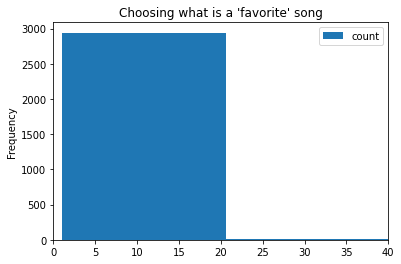

In [6]:
ax = df.groupby(['artist','track']).size().to_frame('count').reset_index().plot(kind='hist',bins=9)
ax.set_xlim(0,40)
ax.set_title("Choosing what is a 'favorite' song")

In [7]:
df.groupby(['artist','track']).size().to_frame('count').reset_index()
df = df.groupby(['artist','track']).size().to_frame('count').reset_index()
df = df[df['count']>=15]
# To display the top 5 rows
df.head(5)

,artist,track,count
186,Bad Bunny,Callaita,110
194,Banda MS de Sergio Lizárraga,Mejor Me Alejo,18
195,Banda MS de Sergio Lizárraga,Por Siempre Mi Amor - Versión Acústica,73
197,Banda MS de Sergio Lizárraga,Que Fuimos - Versión Acústica,31
199,Banda MS de Sergio Lizárraga,Tu Postura,16


In [8]:
# Read-in Song Features dataset
features = pd.read_csv(r"C:\Users\saif\OneDrive\Desktop\reco\dataset\cont/SpotifyFeatures.csv")
# renaming columns
features = features.rename(columns={"artist_name":"artist","track_name":"track"})
features.head(5)

,genre,artist,track,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [9]:
features['same_artists'] = features.artist.isin(df.artist) 
features['same_track'] = features.track.isin(df.track) 
features["favorite"] = np.where((features["same_artists"] == True) & (features["same_track"] == True),1,0) # If both instances are True.
features = features.drop(["same_artists","same_track"],axis=1)

In [10]:
# For future use
future = features.copy(deep=True)

In [11]:
features.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [12]:
features

,genre,artist,track,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,favorite
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,0
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,0
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962,0
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,0
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813,0
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489,0


In [13]:
features[features.genre == 'Comedy'].describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,favorite
count,9681.000000,9681.000000,9681.000000,9.681000e+03,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.0
mean,21.342630,0.793098,0.559038,2.353052e+05,0.676094,0.000574,0.724775,-11.689321,0.853532,98.235488,0.412764,0.0
std,8.428764,0.130313,0.089625,2.502539e+05,0.211705,0.009987,0.223437,4.777983,0.205918,27.839986,0.207258,0.0
min,0.000000,0.000363,0.239000,3.004000e+04,0.001410,0.000000,0.025800,-31.047000,0.023000,32.451000,0.023700,0.0
25%,15.000000,0.753000,0.499000,1.218800e+05,0.522000,0.000000,0.662000,-14.649000,0.888000,79.720000,0.252000,0.0
50%,20.000000,0.819000,0.561000,1.890570e+05,0.704000,0.000000,0.767000,-11.209000,0.928000,90.124000,0.410000,0.0
75%,26.000000,0.872000,0.620000,2.812930e+05,0.859000,0.000000,0.898000,-8.088000,0.944000,115.128000,0.561000,0.0
max,61.000000,0.995000,0.898000,5.552917e+06,0.998000,0.352000,0.996000,-0.255000,0.967000,207.157000,0.980000,0.0


In [14]:
# Removing 'songs' with these genres
features = features[features.genre!='Comedy']
# Track_id
features = features.drop(columns='track_id')

In [15]:
features = features.drop(columns='track')

In [16]:
features.head(1)

,genre,artist,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,favorite
0,Movie,Henri Salvador,0,0.611,0.389,99373,0.91,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814,0


In [17]:
# How the classes are imbalanced
features.favorite.value_counts()

0    223028
1        16
Name: favorite, dtype: int64

In [18]:
X = features.drop(columns=['favorite','genre','artist','key','mode','time_signature'])
y = features.favorite
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X['favorite'] = y
X.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,favorite
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814,0
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816,0
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368,0
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227,0
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390,0


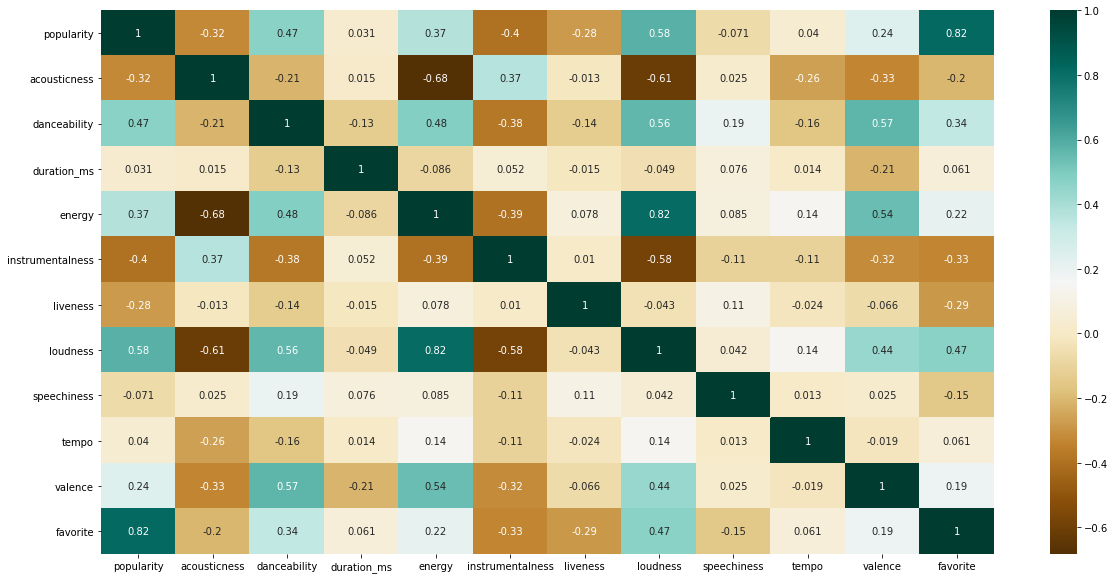

In [19]:
# Correlation Matrix of quantitative features
plt.figure(figsize=(20,10))
c = X.corr()
corr = sns.heatmap(c,cmap="BrBG",annot=True)

In [20]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import f1_score
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

In [21]:
# Train / Split Data
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns='favorite'), X.favorite,test_size = .20)

In [22]:
%%time
# Logistic Regression
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="f1")
np.mean(lr_scores)

Wall time: 36.6 s


c:\users\saif\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8940494229375611

In [23]:
# Hyperparameter optimization for Decision Tree Classifier
parameters = {
    'max_depth':[15,20,30],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

{'max_depth': 30}

In [24]:
%%time
# Decision Tree
dt = DecisionTreeClassifier(max_depth=30)
dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="f1")
np.mean(dt_scores)

Wall time: 1min 41s


0.9994150882930437

In [25]:
# Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[6,12,15,20],
    'n_estimators':[20,30]
}
clf = Pipeline([('CV',GridSearchCV(RandomForestClassifier(), parameters, cv = 5))])
clf.fit(X_train, y_train)
clf.named_steps['CV'].best_params_

{'max_depth': 20, 'n_estimators': 20}

In [26]:
%%time
# Cross-validation for RandomForestClassifier
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 20, max_depth = 30))])
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
np.mean(rf_scores)

Wall time: 6min 22s


0.9999019981965513

In [28]:
prediction = dtc.predict(future.drop(columns=['track','track_id','favorite','genre','artist','key','time_signature','mode']))

In [29]:
future['prediction'] = prediction

In [30]:
future = future[(future['favorite']==0) & (future['prediction'] == 1)]

In [31]:
# Gets only songs that were not favorites but are predicted to be
future = future[(future['favorite']==0) & (future['prediction'] == 1)]

In [41]:
future = future.drop(columns=['track_id','energy','duration_ms','acousticness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence'])

KeyError: "['track_id' 'energy' 'duration_ms' 'acousticness' 'key' 'liveness'\n 'loudness' 'mode' 'speechiness' 'tempo' 'time_signature' 'valence'] not found in axis"

In [45]:
future.head(6)

,genre,artist,track,popularity,danceability,instrumentalness,favorite,prediction
9077,Dance,Zedd,The Middle,87,0.753,0.000000,0,1
9082,Dance,Selena Gomez,Back To You - From 13 Reasons Why – Season 2 S...,84,0.601,0.000002,0,1
9092,Dance,Halsey,Without Me (with Juice WRLD),80,0.742,0.000000,0,1
9104,Dance,Ariana Grande,sweetener,79,0.721,0.000000,0,1
9133,Dance,Kacey Musgraves,Butterflies,75,0.689,0.000019,0,1
13583,Dance,Charlie Puth,Attention,83,0.775,0.000023,0,1
